In [ ]:
import numpy as np
import pandas as pd 
import requests
from matplotlib import pyplot as plt 
from bs4 import BeautifulSoup

In [ ]:
# create urls for all seasons of all leagues
base_url = 'https://understat.com/league'
leagues = ['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1', 'RFPL']
seasons = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [ ]:
# Starting with latest data for Spanish league
url = base_url+'/'+leagues[0]+'/'+seasons[4]
res = requests.get(url)
soup = BeautifulSoup(res.content, "lxml")

# Based on the structure of the webpage, data is found in json file under script tag
scripts = soup.find_all('script')

In [ ]:
import json

string_with_json_obj = ''

# Find data for teams
for el in scripts:
    if 'teamsData' in el.text:
      string_with_json_obj = el.text.strip()
      
# print(string_with_json_obj)

# strip unnecessary symbols and get only JSON data
ind_start = string_with_json_obj.index("('")+2
ind_end = string_with_json_obj.index("')")
json_data = string_with_json_obj[ind_start:ind_end]

json_data = json_data.encode('utf8').decode('unicode_escape')

In [ ]:
# convert JSON data into Python dictionary
data = json.loads(json_data)
print(data.keys())
print('='*50)
print(data['138'].keys())
print('='*50)
print(data['138']['id'])
print('='*50)
print(data['138']['title'])
print('='*50)
print(data['138']['history'][0])


dict_keys(['138', '140', '141', '142', '143', '145', '146', '147', '148', '150', '151', '152', '153', '154', '156', '158', '159', '223', '231', '232'])
dict_keys(['id', 'title', 'history'])
138
Sevilla
{'h_a': 'a', 'xG': 3.34997, 'xGA': 2.39239, 'npxG': 3.34997, 'npxGA': 1.64976, 'ppda': {'att': 252, 'def': 19}, 'ppda_allowed': {'att': 263, 'def': 20}, 'deep': 12, 'deep_allowed': 5, 'scored': 4, 'missed': 1, 'xpts': 1.9829999999999999, 'result': 'w', 'date': '2018-08-19 21:15:00', 'wins': 1, 'draws': 0, 'loses': 0, 'pts': 3, 'npxGD': 1.70021}


In [ ]:
# Get teams and their relevant ids and put them into separate dictionary
teams = {}
for id in data.keys():
  teams[id] = data[id]['title']

In [ ]:
# EDA to get a feeling of how the JSON is structured
# Column names are all the same, so we just use first element
columns = []
# Check the sample of values per each column
values = []
for id in data.keys():
  columns = list(data[id]['history'][0].keys())
  values = list(data[id]['history'][0].values())
  break

print(columns)
print(values)

['h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'ppda', 'ppda_allowed', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins', 'draws', 'loses', 'pts', 'npxGD']
['a', 3.34997, 2.39239, 3.34997, 1.64976, {'att': 252, 'def': 19}, {'att': 263, 'def': 20}, 12, 5, 4, 1, 1.9829999999999999, 'w', '2018-08-19 21:15:00', 1, 0, 0, 3, 1.70021]


In [ ]:
sevilla_data = []
for row in data['138']['history']:
  sevilla_data.append(list(row.values()))
  
df = pd.DataFrame(sevilla_data, columns=columns)
df.head(2)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,a,3.34997,2.392390,3.34997,1.649760,"{'att': 252, 'def': 19}","{'att': 263, 'def': 20}",12,5,4,1,1.9830,w,2018-08-19 21:15:00,1,0,0,3,1.700210
1,h,1.97161,0.671429,1.97161,0.671429,"{'att': 262, 'def': 16}","{'att': 237, 'def': 26}",11,3,0,0,2.3331,d,2018-08-26 21:15:00,0,1,0,1,1.300181


In [ ]:
# Getting data for all teams
dataframes = {}
for id, team in teams.items():
  teams_data = []
  for row in data[id]['history']:
    teams_data.append(list(row.values()))
    
  df = pd.DataFrame(teams_data, columns=columns)
  dataframes[team] = df
  print('Added data for {}.'.format(team))

Added data for Sevilla.
Added data for Real Sociedad.
Added data for Espanyol.
Added data for Getafe.
Added data for Atletico Madrid.
Added data for Rayo Vallecano.
Added data for Valencia.
Added data for Athletic Club.
Added data for Barcelona.
Added data for Real Madrid.
Added data for Levante.
Added data for Celta Vigo.
Added data for Real Betis.
Added data for Villarreal.
Added data for Eibar.
Added data for Alaves.
Added data for Leganes.
Added data for Girona.
Added data for Real Valladolid.
Added data for SD Huesca.


In [ ]:
# Sample check of our newly created DataFrame
dataframes['Barcelona'].head(2)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,h,3.26753,0.248353,3.26753,0.248353,"{'att': 118, 'def': 17}","{'att': 407, 'def': 13}",20,0,3,0,2.9009,w,2018-08-18 23:15:00,1,0,0,3,3.019177
1,a,1.20392,0.510742,1.20392,0.510742,"{'att': 163, 'def': 16}","{'att': 316, 'def': 15}",15,4,1,0,1.9865,w,2018-08-25 23:15:00,1,0,0,3,0.693178


In [ ]:
dataframes['Real Madrid'].head(5)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,h,1.16219,0.188446,1.16219,0.188446,"{'att': 112, 'def': 27}","{'att': 539, 'def': 40}",7,2,2,0,2.3085,w,2018-08-19 23:15:00,1,0,0,3,0.973744
1,a,4.09404,0.502361,2.60748,0.502361,"{'att': 212, 'def': 16}","{'att': 431, 'def': 14}",9,7,4,1,2.9458,w,2018-08-26 23:15:00,1,0,0,3,2.105119
2,h,2.31092,1.001570,1.56777,0.258293,"{'att': 135, 'def': 23}","{'att': 524, 'def': 18}",17,1,4,1,2.3558,w,2018-09-01 18:45:00,1,0,0,3,1.309477
3,a,1.95843,1.451290,1.95843,1.451290,"{'att': 248, 'def': 18}","{'att': 353, 'def': 29}",9,5,1,1,1.7957,d,2018-09-15 18:45:00,0,1,0,1,0.507140
4,h,1.08701,0.424687,1.08701,0.424687,"{'att': 215, 'def': 26}","{'att': 325, 'def': 18}",6,6,1,0,1.9283,w,2018-09-22 18:45:00,1,0,0,3,0.662323


In [ ]:
for team, df in dataframes.items():
    dataframes[team]['ppda_coef'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
    dataframes[team]['ppda_att'] = dataframes[team]['ppda'].apply(lambda x: x['att'])
    dataframes[team]['ppda_def'] = dataframes[team]['ppda'].apply(lambda x: x['def'])
    dataframes[team]['oppda_coef'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
    dataframes[team]['oppda_att'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att'])
    dataframes[team]['oppda_def'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['def'])
    
# And check how our new dataframes look based on Sevilla dataframe
dataframes['Sevilla'].head(2)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,...,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def
0,a,3.34997,2.392390,3.34997,1.649760,"{'att': 252, 'def': 19}","{'att': 263, 'def': 20}",12,5,4,...,0,0,3,1.700210,13.263158,252,19,13.150000,263,20
1,h,1.97161,0.671429,1.97161,0.671429,"{'att': 262, 'def': 16}","{'att': 237, 'def': 26}",11,3,0,...,1,0,1,1.300181,16.375000,262,16,9.115385,237,26


In [ ]:
frames = []
for team, df in dataframes.items():
    df['team'] = team
    frames.append(df)
    
full_stat = pd.concat(frames)
full_stat = full_stat.drop(['ppda', 'ppda_allowed'], axis=1)

In [ ]:
full_stat.head(10)

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team
0,a,3.349970,2.392390,3.349970,1.649760,12,5,4,1,1.9830,...,0,3,1.700210,13.263158,252,19,13.150000,263,20,Sevilla
1,h,1.971610,0.671429,1.971610,0.671429,11,3,0,0,2.3331,...,0,1,1.300181,16.375000,262,16,9.115385,237,26,Sevilla
2,a,0.784969,1.182950,0.784969,1.182950,2,5,0,1,0.9556,...,1,0,-0.397981,12.120000,303,25,7.095238,149,21,Sevilla
3,h,1.082550,2.127170,1.082550,2.127170,20,4,0,2,0.6338,...,1,0,-1.044620,4.115385,107,26,13.409091,295,22,Sevilla
4,a,3.401280,2.248470,3.401280,1.505320,13,9,6,2,2.1285,...,0,3,1.895960,10.217391,235,23,17.800000,267,15,Sevilla
5,h,2.292620,1.553510,2.292620,1.553510,7,10,3,0,1.9024,...,0,3,0.739110,17.647059,300,17,12.294118,209,17,Sevilla
6,a,1.985320,0.563865,1.242040,0.563865,2,2,3,1,2.5246,...,0,3,0.678175,23.909091,263,11,4.676471,159,34,Sevilla
7,h,2.237000,0.895831,2.237000,0.895831,8,9,2,1,2.3711,...,0,3,1.341169,11.000000,242,22,12.238095,257,21,Sevilla
8,a,1.898010,3.219480,1.898010,2.476200,8,8,2,4,0.6312,...,1,0,-0.578190,10.321429,289,28,10.714286,225,21,Sevilla
9,h,1.884310,1.013060,1.884310,1.013060,9,5,2,1,2.0721,...,0,3,0.871250,11.937500,191,16,18.166667,327,18,Sevilla


In [ ]:
full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored']
full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed']
full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']
full_stat.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,a,3.349970,2.392390,3.349970,1.649760,12,5,4,1,1.9830,...,13.263158,252,19,13.150000,263,20,Sevilla,-0.650030,1.392390,-1.0170
1,h,1.971610,0.671429,1.971610,0.671429,11,3,0,0,2.3331,...,16.375000,262,16,9.115385,237,26,Sevilla,1.971610,0.671429,1.3331
2,a,0.784969,1.182950,0.784969,1.182950,2,5,0,1,0.9556,...,12.120000,303,25,7.095238,149,21,Sevilla,0.784969,0.182950,0.9556
3,h,1.082550,2.127170,1.082550,2.127170,20,4,0,2,0.6338,...,4.115385,107,26,13.409091,295,22,Sevilla,1.082550,0.127170,0.6338
4,a,3.401280,2.248470,3.401280,1.505320,13,9,6,2,2.1285,...,10.217391,235,23,17.800000,267,15,Sevilla,-2.598720,0.248470,-0.8715


In [ ]:
season_data = dict()
season_data[seasons[4]] = full_stat
print(season_data)
full_data = dict()
full_data[leagues[0]] = season_data
print(full_data)

{'2018':    h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  scored  \
0    a  3.349970  2.392390  3.349970  1.649760    12             5       4   
1    h  1.971610  0.671429  1.971610  0.671429    11             3       0   
2    a  0.784969  1.182950  0.784969  1.182950     2             5       0   
3    h  1.082550  2.127170  1.082550  2.127170    20             4       0   
4    a  3.401280  2.248470  3.401280  1.505320    13             9       6   
..  ..       ...       ...       ...       ...   ...           ...     ...   
33   h  1.193850  0.651098  1.193850  0.651098     4             4       2   
34   a  1.330980  1.158080  1.330980  1.158080     1             8       1   
35   h  2.417820  2.608680  1.674550  2.608680     5             8       2   
36   a  1.517810  2.009140  0.774535  2.009140     1            10       1   
37   h  1.304680  0.916693  1.304680  0.916693     3             3       2   

    missed    xpts  ...  ppda_coef ppda_att  ppda_def 

In [ ]:
full_data = dict()
for league in leagues:
  
  season_data = dict()
  for season in seasons:    
    url = base_url+'/'+league+'/'+season
    res = requests.get(url)
    soup = BeautifulSoup(res.content, "lxml")

    # Based on the structure of the webpage, I found that data is in the JSON variable, under <script> tags
    scripts = soup.find_all('script')
    
    string_with_json_obj = ''

    # Find data for teams
    for el in scripts:
        if 'teamsData' in el.text:
          string_with_json_obj = el.text.strip()
    # print(string_with_json_obj)

    # strip unnecessary symbols and get only JSON data
    ind_start = string_with_json_obj.index("('")+2
    ind_end = string_with_json_obj.index("')")
    json_data = string_with_json_obj[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    
    
    # convert JSON data into Python dictionary
    data = json.loads(json_data)
    
    # Get teams and their relevant ids and put them into separate dictionary
    teams = {}
    for id in data.keys():
      teams[id] = data[id]['title']

    # EDA to get a feeling of how the JSON is structured
    # Column names are all the same, so we just use first element
    columns = []
    # Check the sample of values per each column
    values = []
    for id in data.keys():
      columns = list(data[id]['history'][0].keys())
      values = list(data[id]['history'][0].values())
      break
      
    # Getting data for all teams
    dataframes = {}
    for id, team in teams.items():
      teams_data = []
      for row in data[id]['history']:
        teams_data.append(list(row.values()))

      df = pd.DataFrame(teams_data, columns=columns)
      dataframes[team] = df
    # print('Added data for {}.'.format(team))

    for team, df in dataframes.items():
        dataframes[team]['ppda_coef'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
        dataframes[team]['ppda_att'] = dataframes[team]['ppda'].apply(lambda x: x['att'])
        dataframes[team]['ppda_def'] = dataframes[team]['ppda'].apply(lambda x: x['def'])
        dataframes[team]['oppda_coef'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
        dataframes[team]['oppda_att'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att'])
        dataframes[team]['oppda_def'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['def'])
    
    frames = []
    for team, df in dataframes.items():
        df['team'] = team
        frames.append(df)
    
    full_stat = pd.concat(frames)
    full_stat = full_stat.drop(['ppda', 'ppda_allowed'], axis=1)

    full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored']
    full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed']
    full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']
    
    full_stat.reset_index(inplace=True, drop=True)
    season_data[season] = full_stat
  
  df_season = pd.concat(season_data)
  full_data[league] = df_season

data = pd.concat(full_data)
data.head()


h_a        xG       xGA      npxG     npxGA  deep  \
La_liga 2014 0   h  1.321070  1.141510  0.438073  1.141510     4   
             1   a  1.131960  1.968630  1.131960  1.069640     4   
             2   h  0.819725  0.358265  0.819725  0.358265     7   
             3   a  0.446347  2.761880  0.446347  2.761880     6   
             4   h  0.278657  0.646364  0.278657  0.646364     4   

                deep_allowed  scored  missed    xpts  ...  ppda_coef ppda_att  \
La_liga 2014 0             5       1       0  1.5303  ...  12.071429      338   
             1             5       0       3  0.7086  ...  15.368421      292   
             2             1       0       0  1.7526  ...   9.846154      128   
             3             2       2       2  0.0628  ...   5.500000       99   
             4             7       0       0  0.8721  ...   9.451613      293   

                ppda_def  oppda_coef  oppda_att  oppda_def    team   xG_diff  \
La_liga 2014 0        28    6.300000        189         30  Malaga  0.321070   
             1        19    6.066667        182         30  Malaga  1.131960   
             2        13    8.925926        241         27  Malaga  0.819725   
             3        18    8.000000        264         33  Malaga -1.553653   
             4        31    4.571429         96         21  Malaga  0.278657   

                xGA_diff  xpts_diff  
La_liga 2014 0  1.141510    -1.4697  
             1 -1.031370     0.7086  
             2  0.358265     0.7526  
             3  0.761880    -0.9372  
             4  0.646364    -0.1279  

[5 rows x 27 columns]

In [ ]:
data.index = data.index.droplevel(2)
data.index = data.index.rename(names=['league','year'], level=[0,1])
data.head()

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   

              scored  missed    xpts  ...  ppda_coef ppda_att  ppda_def  \
league  year                          ...                                 
La_liga 2014       1       0  1.5303  ...  12.071429      338        28   
        2014       0       3  0.7086  ...  15.368421      292        19   
        2014       0       0  1.7526  ...   9.846154      128        13   
        2014       2       2  0.0628  ...   5.500000       99        18   
        2014       0       0  0.8721  ...   9.451613      293        31   

              oppda_coef  oppda_att  oppda_def    team   xG_diff  xGA_diff  \
league  year                                                                 
La_liga 2014    6.300000        189         30  Malaga  0.321070  1.141510   
        2014    6.066667        182         30  Malaga  1.131960 -1.031370   
        2014    8.925926        241         27  Malaga  0.819725  0.358265   
        2014    8.000000        264         33  Malaga -1.553653  0.761880   
        2014    4.571429         96         21  Malaga  0.278657  0.646364   

              xpts_diff  
league  year             
La_liga 2014    -1.4697  
        2014     0.7086  
        2014     0.7526  
        2014    -0.9372  
        2014    -0.1279  

[5 rows x 27 columns]

In [ ]:
laliga = data.head(100)
laliga

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   
...           ..       ...       ...       ...       ...   ...           ...   
        2014   h  1.867380  0.264957  1.867380  0.264957     7             3   
        2014   a  2.389570  1.318940  1.646300  1.318940     2             1   
        2014   h  2.240010  0.095620  2.240010  0.095620     1             2   
        2014   a  0.618923  1.478120  0.618923  1.478120     4            11   
        2014   h  1.082560  1.927390  1.082560  1.927390     8             6   

              scored  missed    xpts  ...  ppda_coef ppda_att  ppda_def  \
league  year                          ...                                 
La_liga 2014       1       0  1.5303  ...  12.071429      338        28   
        2014       0       3  0.7086  ...  15.368421      292        19   
        2014       0       0  1.7526  ...   9.846154      128        13   
        2014       2       2  0.0628  ...   5.500000       99        18   
        2014       0       0  0.8721  ...   9.451613      293        31   
...              ...     ...     ...  ...        ...      ...       ...   
        2014       2       2  2.6453  ...   5.403846      281        52   
        2014       2       1  2.1840  ...   5.657143      198        35   
        2014       2       0  2.9020  ...   6.958333      167        24   
        2014       0       2  0.6868  ...  12.518519      338        27   
        2014       0       2  0.4768  ...   5.127660      241        47   

              oppda_coef  oppda_att  oppda_def                 team   xG_diff  \
league  year                                                                    
La_liga 2014    6.300000        189         30               Malaga  0.321070   
        2014    6.066667        182         30               Malaga  1.131960   
        2014    8.925926        241         27               Malaga  0.819725   
        2014    8.000000        264         33               Malaga -1.553653   
        2014    4.571429         96         21               Malaga  0.278657   
...                  ...        ...        ...                  ...       ...   
        2014    6.172414        179         29  Deportivo La Coruna -0.132620   
        2014    9.666667        116         12  Deportivo La Coruna  0.389570   
        2014   10.400000        260         25  Deportivo La Coruna  0.240010   
        2014   10.500000        189         18  Deportivo La Coruna  0.618923   
        2014    4.200000        147         35  Deportivo La Coruna  1.082560   

              xGA_diff  xpts_diff  
league  year                       
La_liga 2014  1.141510    -1.4697  
        2014 -1.031370     0.7086  
        2014  0.358265     0.7526  
        2014  0.761880    -0.9372  
        2014  0.646364    -0.1279  
...                ...        ...  
        2014 -1.735043     1.6453  
        2014  0.318940    -0.8160  
        2014  0.095620    -0.0980  
        2014 -0.521880     0.6868  
        2014 -0.072610     0.4768  

[100 rows x 27 columns]

In [ ]:
print(list(laliga.columns.values))

['h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins', 'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff', 'xpts_diff']


#MULTILINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   

              scored  missed    xpts result                 date  wins  draws  \
league  year                                                                    
La_liga 2014       1       0  1.5303      w  2014-08-23 18:00:00     1      0   
        2014       0       3  0.7086      l  2014-08-29 21:00:00     0      0   
        2014       0       0  1.7526      d  2014-09-13 17:00:00     0      1   
        2014       2       2  0.0628      d  2014-09-20 21:00:00     0      1   
        2014       0       0  0.8721      d  2014-09-24 21:00:00     0      1   

              loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
league  year                                                                    
La_liga 2014      0    3 -0.703437  12.071429       338        28    6.300000   
        2014      1    0  0.062320  15.368421       292        19    6.066667   
        2014      0    1  0.461460   9.846154       128        13    8.925926   
        2014      0    1 -2.315533   5.500000        99        18    8.000000   
        2014      0    1 -0.367707   9.451613       293        31    4.571429   

              oppda_att  oppda_def    team   xG_diff  xGA_diff  xpts_diff  
league  year                                                               
La_liga 2014        189         30  Malaga  0.321070  1.141510    -1.4697  
        2014        182         30  Malaga  1.131960 -1.031370     0.7086  
        2014        241         27  Malaga  0.819725  0.358265     0.7526  
        2014        264         33  Malaga -1.553653  0.761880    -0.9372  
        2014         96         21  Malaga  0.278657  0.646364    -0.1279

In [ ]:
x = data[['xG', 'xGA', 'npxG','npxGA','xpts']]
y = data['scored']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30) 

In [ ]:
from sklearn.linear_model import LinearRegression
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.15782969858570062
Coefficients:


[('xG', 0.9075990221363041),
 ('xGA', 0.04514277236645078),
 ('npxG', 0.0437601141695857),
 ('npxGA', -0.09380507552171959),
 ('xpts', -0.003750388857571847)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [1.32169329 1.54409026 0.80055579 ... 0.47824396 1.07132557 0.76255143]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(20)

Actual value  Predicted value
league     year                               
Serie_A    2015             3         1.321693
RFPL       2018             2         1.544090
EPL        2019             0         0.800556
RFPL       2020             1         1.128901
Ligue_1    2018             1         1.455729
RFPL       2015             0         0.409595
           2015             1         1.666555
La_liga    2019             1         1.865780
Bundesliga 2017             1         0.566945
RFPL       2016             1         1.588255
           2019             3         0.915516
           2018             0         0.789070
Ligue_1    2015             1         0.529823
Serie_A    2020             2         1.521587
EPL        2017             0         0.512209
Bundesliga 2016             1         0.971978
           2018             1         1.254728
La_liga    2020             1         0.465147
EPL        2015             3         2.277403
La_liga    2018             0         0.234874

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 41.63
Mean Absolute Error: 0.7441492043449285
Mean Square Error: 0.9012634716538314
Root Mean Square Error: 0.9493489725353008


In [ ]:
print("Accuracy = {:.2f}".format(mlr.score(x,y)*100)) #accuracy is r2 value which measures how our regression model performs

Accuracy = 41.63


# DECISION TREE


In [ ]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   

              scored  missed    xpts result                 date  wins  draws  \
league  year                                                                    
La_liga 2014       1       0  1.5303      w  2014-08-23 18:00:00     1      0   
        2014       0       3  0.7086      l  2014-08-29 21:00:00     0      0   
        2014       0       0  1.7526      d  2014-09-13 17:00:00     0      1   
        2014       2       2  0.0628      d  2014-09-20 21:00:00     0      1   
        2014       0       0  0.8721      d  2014-09-24 21:00:00     0      1   

              loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
league  year                                                                    
La_liga 2014      0    3 -0.703437  12.071429       338        28    6.300000   
        2014      1    0  0.062320  15.368421       292        19    6.066667   
        2014      0    1  0.461460   9.846154       128        13    8.925926   
        2014      0    1 -2.315533   5.500000        99        18    8.000000   
        2014      0    1 -0.367707   9.451613       293        31    4.571429   

              oppda_att  oppda_def    team   xG_diff  xGA_diff  xpts_diff  
league  year                                                               
La_liga 2014        189         30  Malaga  0.321070  1.141510    -1.4697  
        2014        182         30  Malaga  1.131960 -1.031370     0.7086  
        2014        241         27  Malaga  0.819725  0.358265     0.7526  
        2014        264         33  Malaga -1.553653  0.761880    -0.9372  
        2014         96         21  Malaga  0.278657  0.646364    -0.1279

In [ ]:
featured_cols = ['xG','xGA','npxG','oppda_coef','ppda_coef']
X = df[featured_cols]
y = df['scored']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier                            
classifier = DecisionTreeClassifier(criterion="entropy", random_state=100)   
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
12,0,0
16,0,1
9,0,0
21,0,0
10,0,3
11,2,0
2,1,1
0,0,0
18,1,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[4 1 0 1]
 [0 2 0 0]
 [1 0 0 0]
 [0 0 0 0]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.67         9
   macro avg       0.37      0.42      0.38         9
weighted avg       0.68      0.67      0.66         9



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
import graphviz 
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
import pydotplus
from IPython.display import Image

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = featured_cols ,class_names=['0','1','2','3','4','5','6','7','8','9','10'])

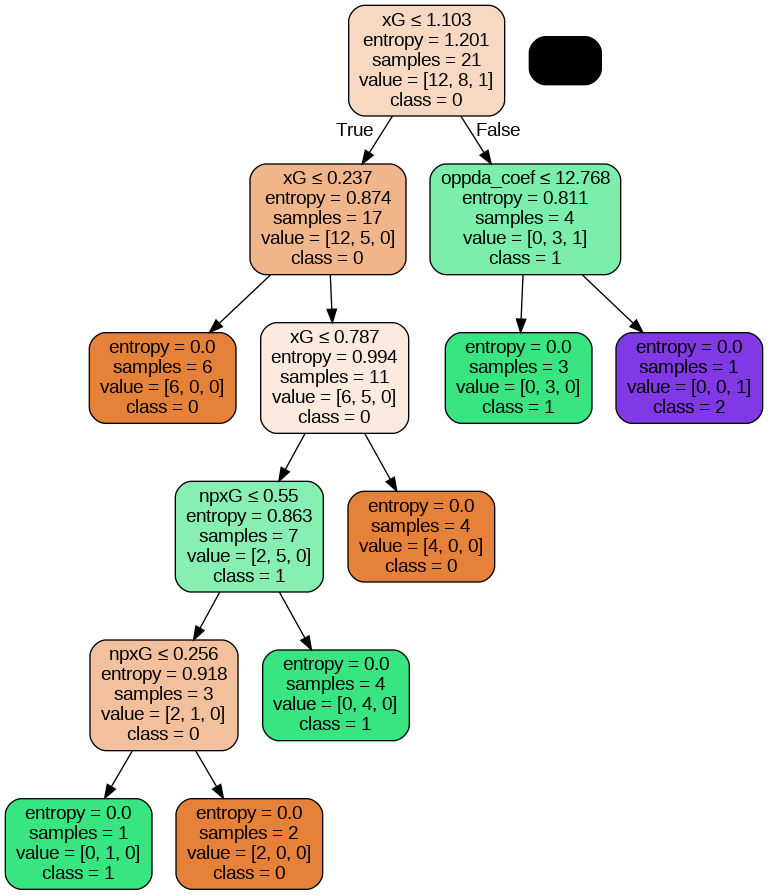

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#NAIVE BAYES

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   

              scored  missed    xpts result                 date  wins  draws  \
league  year                                                                    
La_liga 2014       1       0  1.5303      w  2014-08-23 18:00:00     1      0   
        2014       0       3  0.7086      l  2014-08-29 21:00:00     0      0   
        2014       0       0  1.7526      d  2014-09-13 17:00:00     0      1   
        2014       2       2  0.0628      d  2014-09-20 21:00:00     0      1   
        2014       0       0  0.8721      d  2014-09-24 21:00:00     0      1   

              loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
league  year                                                                    
La_liga 2014      0    3 -0.703437  12.071429       338        28    6.300000   
        2014      1    0  0.062320  15.368421       292        19    6.066667   
        2014      0    1  0.461460   9.846154       128        13    8.925926   
        2014      0    1 -2.315533   5.500000        99        18    8.000000   
        2014      0    1 -0.367707   9.451613       293        31    4.571429   

              oppda_att  oppda_def    team   xG_diff  xGA_diff  xpts_diff  
league  year                                                               
La_liga 2014        189         30  Malaga  0.321070  1.141510    -1.4697  
        2014        182         30  Malaga  1.131960 -1.031370     0.7086  
        2014        241         27  Malaga  0.819725  0.358265     0.7526  
        2014        264         33  Malaga -1.553653  0.761880    -0.9372  
        2014         96         21  Malaga  0.278657  0.646364    -0.1279

In [ ]:
featured_cols = ['xG','xGA','npxG','oppda_coef','ppda_coef']
X = df[featured_cols]
y = df['result']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
GaussianNB()
y_pred = classifier.predict(X_test) 
y_pred

array(['l', 'l', 'l', 'd', 'l', 'l', 'l', 'l', 'l'], dtype='<U1')

In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(data_p)
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
#l - loss
#w - wins
#d - draws

   Actual Predicted
8       l         l
0       l         l
13      d         l
19      w         d
17      w         l
1       d         l
18      w         l
22      l         l
15      l         l
Accuracy:  0.4444444444444444


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[0 2 0]
 [0 4 0]
 [1 2 0]]
              precision    recall  f1-score   support

           d       0.00      0.00      0.00         2
           l       0.50      1.00      0.67         4
           w       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.17      0.33      0.22         9
weighted avg       0.22      0.44      0.30         9



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#K-MEANS CLUSTERING

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set()
from sklearn.cluster import KMeans

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   

              scored  missed    xpts result                 date  wins  draws  \
league  year                                                                    
La_liga 2014       1       0  1.5303      w  2014-08-23 18:00:00     1      0   
        2014       0       3  0.7086      l  2014-08-29 21:00:00     0      0   
        2014       0       0  1.7526      d  2014-09-13 17:00:00     0      1   
        2014       2       2  0.0628      d  2014-09-20 21:00:00     0      1   
        2014       0       0  0.8721      d  2014-09-24 21:00:00     0      1   

              loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
league  year                                                                    
La_liga 2014      0    3 -0.703437  12.071429       338        28    6.300000   
        2014      1    0  0.062320  15.368421       292        19    6.066667   
        2014      0    1  0.461460   9.846154       128        13    8.925926   
        2014      0    1 -2.315533   5.500000        99        18    8.000000   
        2014      0    1 -0.367707   9.451613       293        31    4.571429   

              oppda_att  oppda_def    team   xG_diff  xGA_diff  xpts_diff  
league  year                                                               
La_liga 2014        189         30  Malaga  0.321070  1.141510    -1.4697  
        2014        182         30  Malaga  1.131960 -1.031370     0.7086  
        2014        241         27  Malaga  0.819725  0.358265     0.7526  
        2014        264         33  Malaga -1.553653  0.761880    -0.9372  
        2014         96         21  Malaga  0.278657  0.646364    -0.1279

In [ ]:
df_kmeans = data.head(500)
df_kmeans

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   
...           ..       ...       ...       ...       ...   ...           ...   
        2014   a  0.786352  0.241504  0.786352  0.241504     9             2   
        2014   h  2.853950  1.300120  2.853950  1.300120     1             6   
        2014   a  0.926164  2.428680  0.182886  2.428680     4            12   
        2014   h  1.192990  1.040570  1.192990  0.297295     3             4   
        2014   a  2.040080  0.402099  2.040080  0.402099    12             3   

              scored  missed    xpts result                 date  wins  draws  \
league  year                                                                    
La_liga 2014       1       0  1.5303      w  2014-08-23 18:00:00     1      0   
        2014       0       3  0.7086      l  2014-08-29 21:00:00     0      0   
        2014       0       0  1.7526      d  2014-09-13 17:00:00     0      1   
        2014       2       2  0.0628      d  2014-09-20 21:00:00     0      1   
        2014       0       0  0.8721      d  2014-09-24 21:00:00     0      1   
...              ...     ...     ...    ...                  ...   ...    ...   
        2014       1       1  1.8725      d  2014-08-30 18:00:00     0      1   
        2014       2       2  2.4834      d  2014-09-13 21:00:00     0      1   
        2014       2       2  0.3961      d  2014-09-20 19:00:00     0      1   
        2014       2       1  1.4133      w  2014-09-23 21:00:00     1      0   
        2014       1       0  2.5655      w  2014-09-26 20:00:00     1      0   

              loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
league  year                                                                    
La_liga 2014      0    3 -0.703437  12.071429       338        28    6.300000   
        2014      1    0  0.062320  15.368421       292        19    6.066667   
        2014      0    1  0.461460   9.846154       128        13    8.925926   
        2014      0    1 -2.315533   5.500000        99        18    8.000000   
        2014      0    1 -0.367707   9.451613       293        31    4.571429   
...             ...  ...       ...        ...       ...       ...         ...   
        2014      0    1  0.544848   6.121212       202        33   12.370370   
        2014      0    1  1.553830   7.538462       196        26   13.375000   
        2014      0    1 -2.245794   8.388889       151        18    9.230769   
        2014      0    3  0.895695   4.857143       170        35    9.545455   
        2014      0    3  1.637981   7.000000       175        25   11.130435   

              oppda_att  oppda_def        team   xG_diff  xGA_diff  xpts_diff  
league  year                                                                   
La_liga 2014        189         30      Malaga  0.321070  1.141510    -1.4697  
        2014        182         30      Malaga  1.131960 -1.031370     0.7086  
        2014        241         27      Malaga  0.819725  0.358265     0.7526  
        2014        264         33      Malaga -1.553653  0.761880    -0.9372  
        2014         96         21      Malaga  0.278657  0.646364    -0.1279  
...                 ...        ...         ...       ...       ...        ...  
        2014        334         27  Celta Vigo -0.213648 -0.758496     0.8725  
        2014        214         16  Celta Vigo  0.853950 -0.699880     1.4834  
        2014        240         26  Celta Vigo -1.073836  0.4286

Text(0, 0.5, 'xpts')

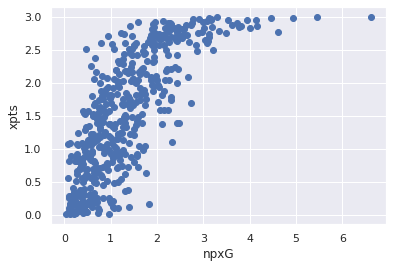

In [ ]:
plt.scatter(df_kmeans["npxG"], 
            df_kmeans["xpts"])
plt.xlabel("npxG")
plt.ylabel("xpts")

Text(0, 0.5, 'xpts')

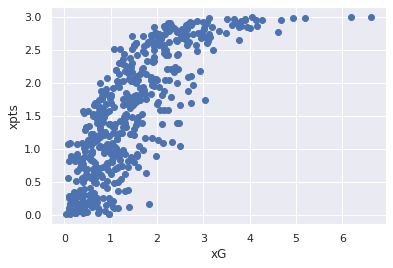

In [ ]:
plt.scatter(df_kmeans["xG"], 
            df_kmeans["xpts"])
plt.xlabel("xG")
plt.ylabel("xpts")

Text(0, 0.5, 'xpts')

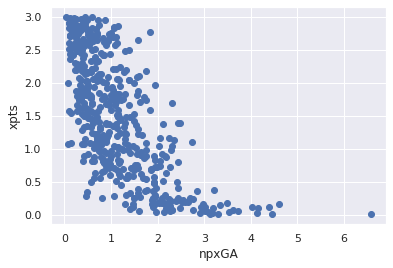

In [ ]:
plt.scatter(df_kmeans["npxGA"], 
            df_kmeans["xpts"])
plt.xlabel("npxGA")
plt.ylabel("xpts")

In [ ]:
relevant_cols = ["npxG", "xG", "npxGA"]

football_df = df_kmeans[relevant_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(football_df)
scaled_data = scaler.transform(football_df)

In [ ]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [ ]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

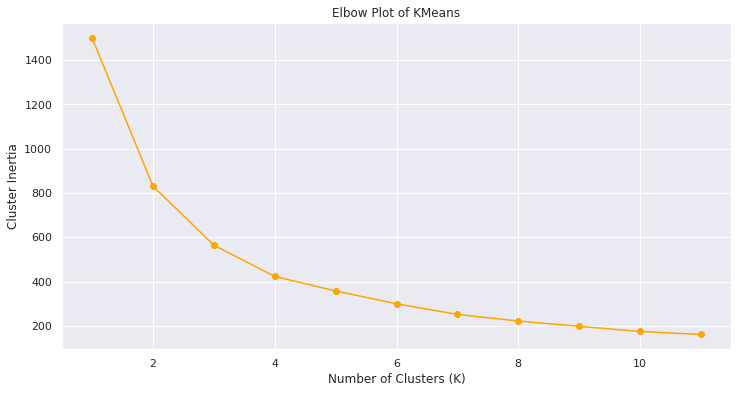

In [ ]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

In [ ]:
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
df_kmeans["clusters"] = kmeans_model.labels_
df_kmeans.head()

<ipython-input-81-ed716a195945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans["clusters"] = kmeans_model.labels_


h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league  year                                                                   
La_liga 2014   h  1.321070  1.141510  0.438073  1.141510     4             5   
        2014   a  1.131960  1.968630  1.131960  1.069640     4             5   
        2014   h  0.819725  0.358265  0.819725  0.358265     7             1   
        2014   a  0.446347  2.761880  0.446347  2.761880     6             2   
        2014   h  0.278657  0.646364  0.278657  0.646364     4             7   

              scored  missed    xpts result                 date  wins  draws  \
league  year                                                                    
La_liga 2014       1       0  1.5303      w  2014-08-23 18:00:00     1      0   
        2014       0       3  0.7086      l  2014-08-29 21:00:00     0      0   
        2014       0       0  1.7526      d  2014-09-13 17:00:00     0      1   
        2014       2       2  0.0628      d  2014-09-20 21:00:00     0      1   
        2014       0       0  0.8721      d  2014-09-24 21:00:00     0      1   

              loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
league  year                                                                    
La_liga 2014      0    3 -0.703437  12.071429       338        28    6.300000   
        2014      1    0  0.062320  15.368421       292        19    6.066667   
        2014      0    1  0.461460   9.846154       128        13    8.925926   
        2014      0    1 -2.315533   5.500000        99        18    8.000000   
        2014      0    1 -0.367707   9.451613       293        31    4.571429   

              oppda_att  oppda_def    team   xG_diff  xGA_diff  xpts_diff  \
league  year                                                                
La_liga 2014        189         30  Malaga  0.321070  1.141510    -1.4697   
        2014        182         30  Malaga  1.131960 -1.031370     0.7086   
        2014        241         27  Malaga  0.819725  0.358265     0.7526   
        2014        264         33  Malaga -1.553653  0.761880    -0.9372   
        2014         96         21  Malaga  0.278657  0.646364    -0.1279   

              clusters  
league  year            
La_liga 2014         2  
        2014         2  
        2014         2  
        2014         0  
        2014         2

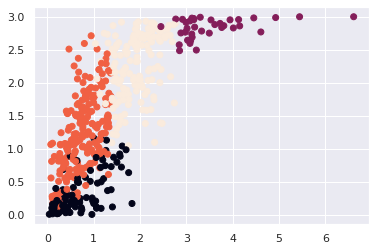

In [ ]:
plt.scatter(df_kmeans["npxG"], 
            df_kmeans["xpts"], 
            c = df_kmeans["clusters"])

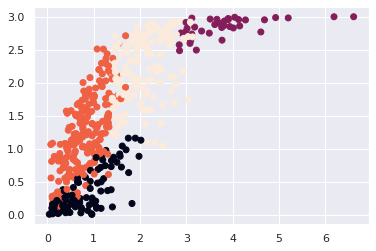

In [ ]:
plt.scatter(df_kmeans["xG"], 
            df_kmeans["xpts"], 
            c = df_kmeans["clusters"])

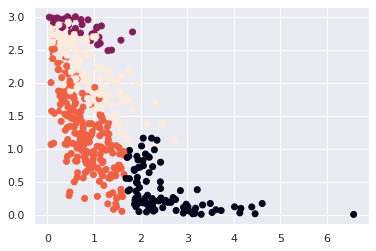

In [ ]:
plt.scatter(df_kmeans["npxGA"], 
            df_kmeans["xpts"], 
            c = df_kmeans["clusters"])